In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import set_config
from sklearn.metrics import r2_score

# Output dataframes instead of arrays
set_config(transform_output="pandas")

In [2]:
df = pd.read_csv('Pharmaceutical Drug Spending by countries.csv')
df


,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76
...,...,...,...,...,...,...,...
1031,USA,2011,11.855,1.939,965.580,NaN,300935.91
1032,USA,2012,11.459,1.874,964.237,NaN,302768.85
1033,USA,2013,11.384,1.858,980.864,NaN,310154.01
1034,USA,2014,11.968,1.981,1081.402,NaN,344495.16


In [3]:
# dropping Russia because there's only 1 data point
pharma = df[df['LOCATION'] !='RUS']
pharma

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76
...,...,...,...,...,...,...,...
1031,USA,2011,11.855,1.939,965.580,NaN,300935.91
1032,USA,2012,11.459,1.874,964.237,NaN,302768.85
1033,USA,2013,11.384,1.858,980.864,NaN,310154.01
1034,USA,2014,11.968,1.981,1081.402,NaN,344495.16


Testing linear regression with 1 country (Canada), USD_CAP vs Time

In [ ]:
canada = pharma[pharma['LOCATION'] == 'CAN']
canada


In [5]:
can_year = canada['TIME'].unique()
len(can_year)

45

In [7]:
canada_train, canada_test = train_test_split(
    canada, train_size=0.8, random_state=42
)

In [8]:
canada_train.shape

(36, 7)

In [9]:
canada_test.shape

(9, 7)

In [10]:
lm = LinearRegression()
lm.fit(
   canada_train[["TIME"]],
   canada_train["USD_CAP"]  
)

# Make a dataframe containing b_1 (slope) and b_0 (intercept) coefficients
pd.DataFrame({"slope": [lm.coef_[0]], "intercept": [lm.intercept_]})

,slope,intercept
0,18.434472,-36413.314416


In [11]:
# make predictions
canada_test["predicted"] = lm.predict(canada_test[["TIME"]])

# calculate RMSPE
RMSPE = mean_squared_error(
    y_true=canada_test["TIME"],
    y_pred=canada_test["predicted"]
)**(1/2)

RMSPE

1634.4241709320454

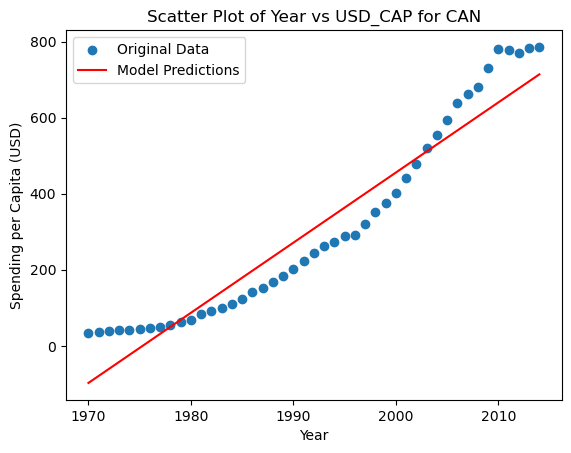

In [11]:
# This line calculates the minimum and maximum values of the "TIME" column in the canada dataset.
time_prediction_grid = canada[["TIME"]].agg(["min", "max"])

# Uses the linear model to predict prices for the min and max time values.
time_prediction_grid["predicted"] = lm.predict(time_prediction_grid)

# Plot the original data
plt.scatter(canada["TIME"], canada["USD_CAP"], label='Original Data')

# Plot the model predictions as a line
plt.plot(time_prediction_grid["TIME"], time_prediction_grid["predicted"], color='red', label='Model Predictions')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Spending per Capita (USD)')
plt.title('Scatter Plot of Year vs USD_CAP for CAN')
plt.legend()

# Show the plot
plt.show()

Linear Regression with the whole dataset (all countries across all years, minus Russia), USD_CAP vs Time

In [62]:
def LR(country):

    country_name = country.LOCATION.unique()[0]

    country_train, country_test = train_test_split(
        country, train_size=0.8, random_state=42
    )

    lm = LinearRegression()
    lm.fit(
    country_train[["TIME"]],
    country_train["USD_CAP"]  
    )

    print(pd.DataFrame({"slope": [lm.coef_[0]], "intercept": [lm.intercept_]}))

    # make predictions
    country_test["predicted"] = lm.predict(country_test[["TIME"]])

    # calculate RMSPE
    RMSPE = mean_squared_error(
        y_true=country_test["TIME"],
        y_pred=country_test["predicted"]
    )**(1/2)
    print(f"The RMSPE for {country_name} is: {RMSPE:.4f}")

    # calculate R^2 score
    r2 = r2_score(country_test["USD_CAP"], country_test["predicted"])
    print(f"R^2 score: {r2}")

    # This line calculates the minimum and maximum values of the "TIME" column in the canada dataset.
    time_prediction_grid = country[["TIME"]].agg(["min", "max"])

    # Uses the linear model to predict prices for the min and max time values.
    time_prediction_grid["predicted"] = lm.predict(time_prediction_grid)

    # Plot the original data
    plt.scatter(country["TIME"], country["USD_CAP"], label='Original Data')

    # Plot the model predictions as a line
    plt.plot(time_prediction_grid["TIME"], time_prediction_grid["predicted"], color='red', label='Model Predictions')

    # Add labels and legend
    plt.xlabel('Year')
    plt.ylabel('Spending per Capita (USD)')
    plt.title(f'Scatter Plot of Year vs USD_CAP of {country_name}')
    plt.legend()

    # Show the plot
    plt.show()

In [49]:
countries = pharma.LOCATION.unique()
countries


array(['AUS', 'AUT', 'BEL', 'CAN', 'CHE', 'CZE', 'DEU', 'DNK', 'ESP',
       'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IRL', 'ISL', 'ISR',
       'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'NLD', 'NOR',
       'NZL', 'POL', 'PRT', 'SVK', 'SVN', 'SWE', 'TUR', 'USA'],
      dtype=object)

In [ ]:
for c in countries:
    country_data = pharma[pharma['LOCATION'] == c]
    LR(country_data)


Using Adrienne's code to find the countries with the most amount of data points

/var/folders/vk/7f5v13993c58cswjwb8_rwvm0000gq/T/ipykernel_83599/2294791767.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)


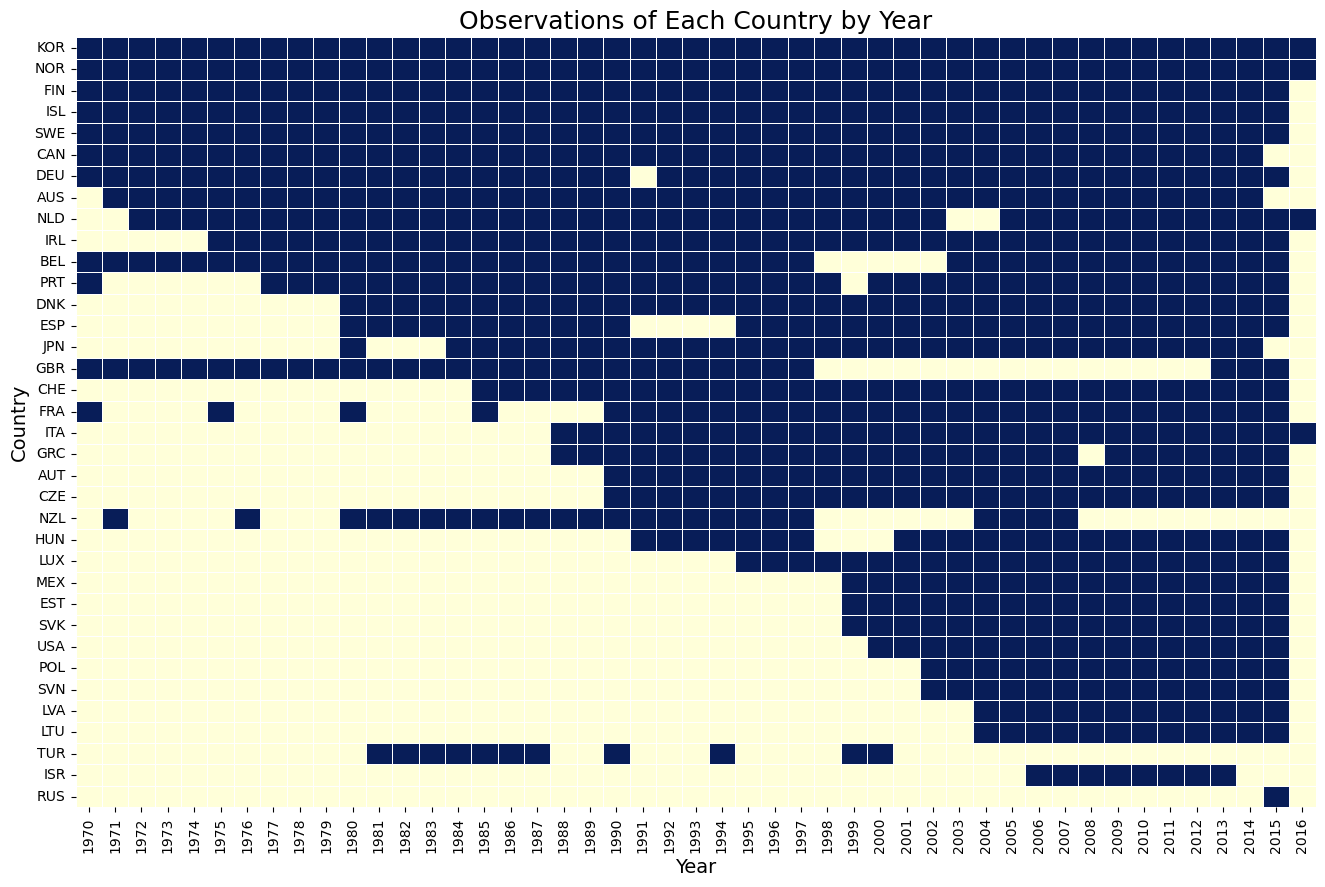

In [27]:
# Create a pivot table with countries as rows and years as columns
pivot_table = df.pivot_table(index='LOCATION', columns='TIME', aggfunc='size', fill_value=0)

# Convert the pivot table to a binary format (presence or absence of observation)
pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)

# Count the number of observations per country
observation_counts = pivot_table.sum(axis=1)

# Sort the countries by the number of observations
sorted_countries = observation_counts.sort_values(ascending=False).index

# Reorder the pivot table based on the sorted countries
pivot_table_sorted = pivot_table.loc[sorted_countries]

# Plot the heatmap
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(pivot_table_sorted, cmap="YlGnBu", cbar=False, linewidths=.5)

# Add labels and title
heatmap.set_xlabel('Year', fontsize=14)
heatmap.set_ylabel('Country', fontsize=14)
heatmap.set_title('Observations of Each Country by Year', fontsize=18)

# Display the heatmap
plt.show()

In [ ]:
pivot_table_sorted

Linear Regression with 7 countries with the most data from 1970-2015, no imputation

In [45]:
# Creating new database with the top 7 countries with the most years of data (1970-2015), no imputation
pivot_table_allyears = pivot_table_sorted.iloc[:7].index
df_all_years1 = df[
    (df["LOCATION"].isin(pivot_table_allyears)) & 
    (df["TIME"] >= 1970) & 
    (df["TIME"] <= 2015)
]
df_all_years1

# Export df_all_years to a CSV file
#df_all_years.to_csv("filtered_data.csv", index=False)


,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
111,CAN,1970,11.962,0.760,34.512,NaN,735.93
112,CAN,1971,11.529,0.762,37.493,NaN,811.56
113,CAN,1972,10.962,0.716,38.279,NaN,841.89
114,CAN,1973,10.942,0.679,40.480,NaN,905.51
115,CAN,1974,10.026,0.611,40.559,NaN,923.69
...,...,...,...,...,...,...,...
1004,SWE,2011,10.245,1.094,478.705,NaN,4523.39
1005,SWE,2012,10.149,1.110,496.505,NaN,4726.42
1006,SWE,2013,9.846,1.093,499.194,NaN,4792.45
1007,SWE,2014,9.816,1.094,507.491,NaN,4920.69


USD_CAP vs TIME

       slope     intercept
0  18.434472 -36413.314416
The RMSPE for CAN is: 78.4228
R^2 score: 0.9312499464603914


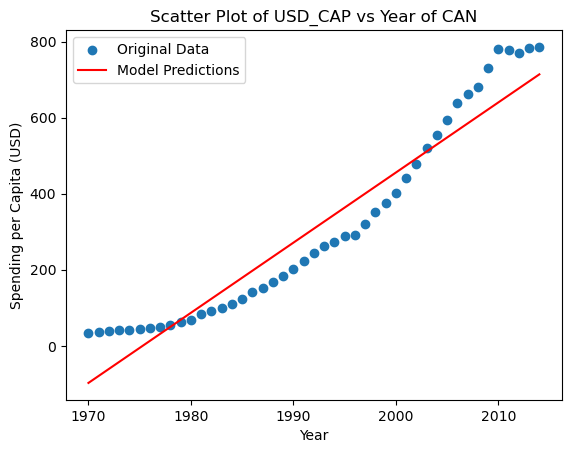

       slope    intercept
0  15.145744 -29855.14319
The RMSPE for DEU is: 53.5014
R^2 score: 0.9521668753334271


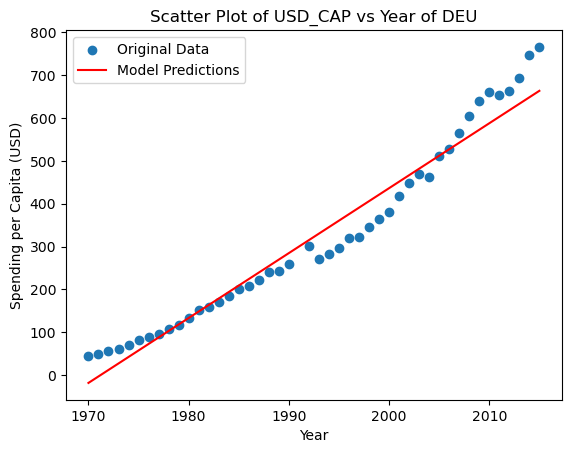

       slope     intercept
0  12.026036 -23748.315607
The RMSPE for FIN is: 38.9422
R^2 score: 0.956153106658203


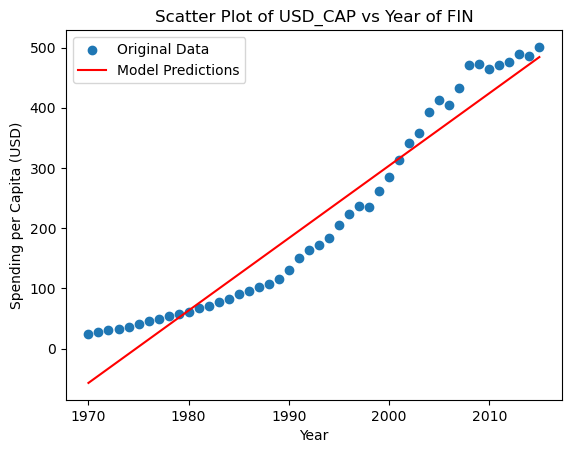

       slope     intercept
0  12.725051 -25068.051738
The RMSPE for ISL is: 46.1536
R^2 score: 0.9471807888262468


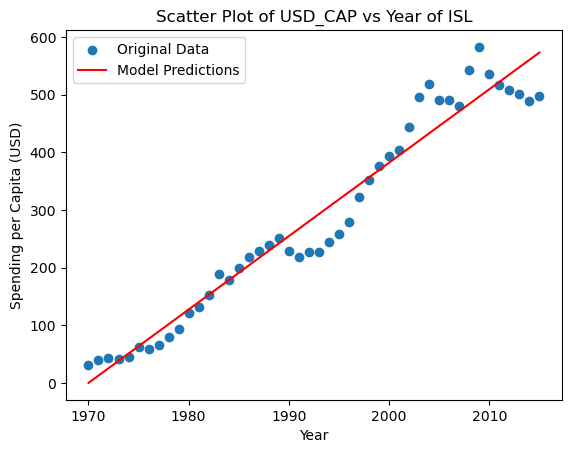

       slope     intercept
0  12.859938 -25457.548279
The RMSPE for KOR is: 81.8051
R^2 score: 0.860869349640884


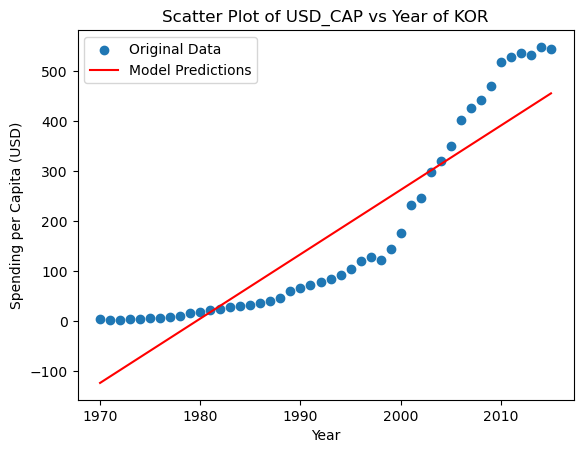

       slope     intercept
0  11.491798 -22704.233471
The RMSPE for NOR is: 34.9162
R^2 score: 0.9599305196973515


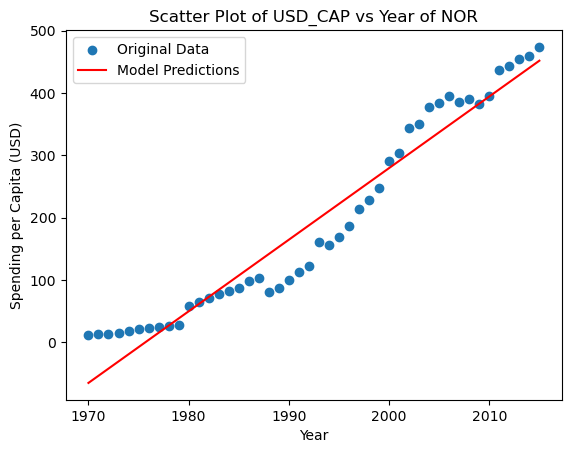

       slope     intercept
0  12.648363 -24981.356931
The RMSPE for SWE is: 33.7806
R^2 score: 0.9677447554113756


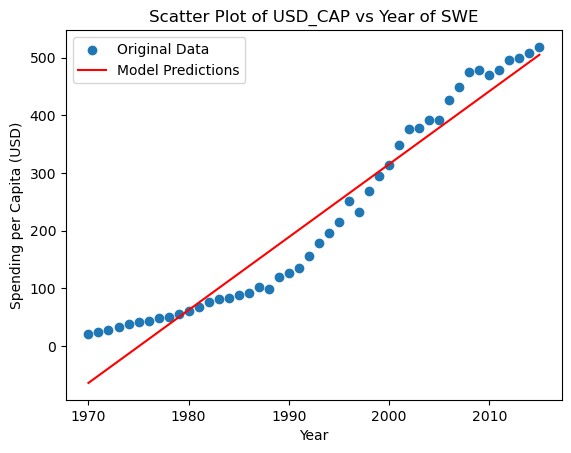

In [64]:
# Defining the linear regression function for USD_CAP vs TIME
def LR(country):

    country_name = country.LOCATION.unique()[0]

    country_train, country_test = train_test_split(
        country, train_size=0.8, random_state=42
    )

    lm = LinearRegression()
    lm.fit(
    country_train[["TIME"]],
    country_train["USD_CAP"]  
    )

    print(pd.DataFrame({"slope": [lm.coef_[0]], "intercept": [lm.intercept_]}))

    # make predictions
    country_test["predicted"] = lm.predict(country_test[["TIME"]])

    # calculate and RMSPE to 4 decimal points
    RMSPE = mean_squared_error(
        y_true=country_test["USD_CAP"],
        y_pred=country_test["predicted"]
    )**(1/2)
    print(f"The RMSPE for {country_name} is: {RMSPE:.4f}")

    # calculate R^2 score
    r2 = r2_score(country_test["USD_CAP"], country_test["predicted"])
    print(f"R^2 score: {r2}")

    # This line calculates the minimum and maximum values of the "TIME" column in the df_all_years dataset.
    time_prediction_grid = country[["TIME"]].agg(["min", "max"])

    # Uses the linear model to predict prices for the min and max time values.
    time_prediction_grid["predicted"] = lm.predict(time_prediction_grid)

    # Plot the original data
    plt.scatter(country["TIME"], country["USD_CAP"], label='Original Data')

    # Plot the model predictions as a line
    plt.plot(time_prediction_grid["TIME"], time_prediction_grid["predicted"], color='red', label='Model Predictions')

    # Add labels and legend
    plt.xlabel('Year')
    plt.ylabel('Spending per Capita (USD)')
    plt.title(f'Scatter Plot of USD_CAP vs Year of {country_name}')
    plt.legend()

    # Show the plot
    plt.show()

# Applying the function to each country in df_all_years
for country_name, country_group in df_all_years1.groupby("LOCATION"):
    LR(country_group)

PC_GDP VS Time

      slope  intercept
0  0.032396 -63.387439
The RMSPE for CAN is: 0.1016
R^2 score: 0.9612094809515035


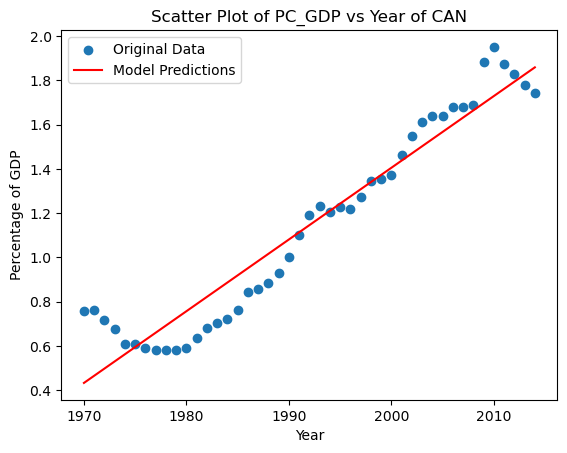

      slope  intercept
0  0.014132 -26.845874
The RMSPE for DEU is: 0.0510
R^2 score: 0.9358292449966583


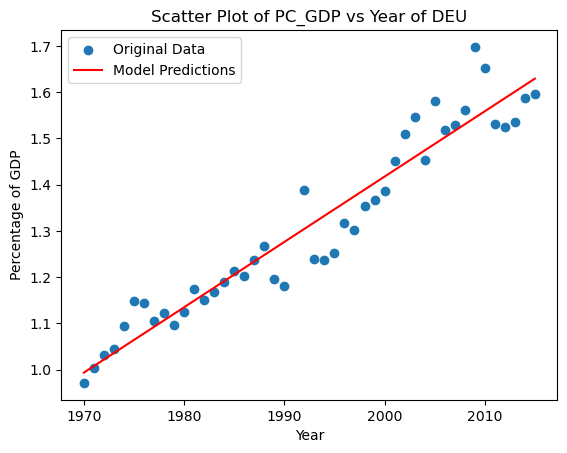

      slope  intercept
0  0.015035 -29.035565
The RMSPE for FIN is: 0.1021
R^2 score: 0.8158551647798002


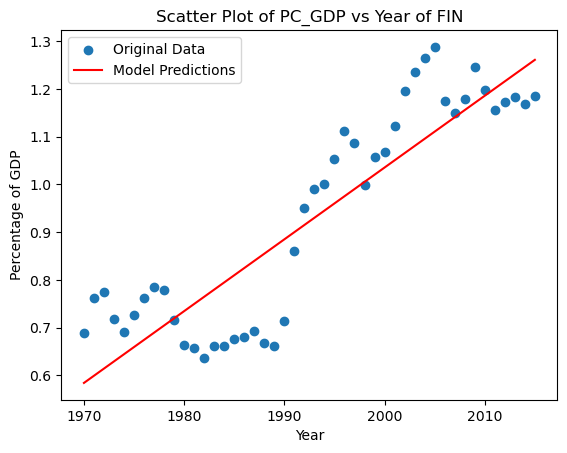

      slope  intercept
0  0.011345 -21.481072
The RMSPE for ISL is: 0.1329
R^2 score: 0.6777837611893132


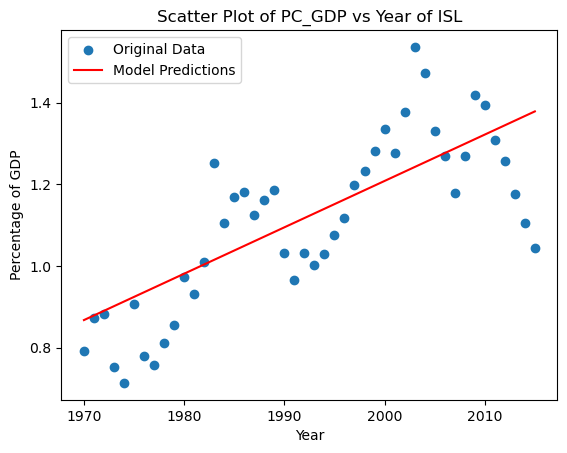

      slope  intercept
0  0.028618 -56.066735
The RMSPE for KOR is: 0.1592
R^2 score: 0.9072486572523351


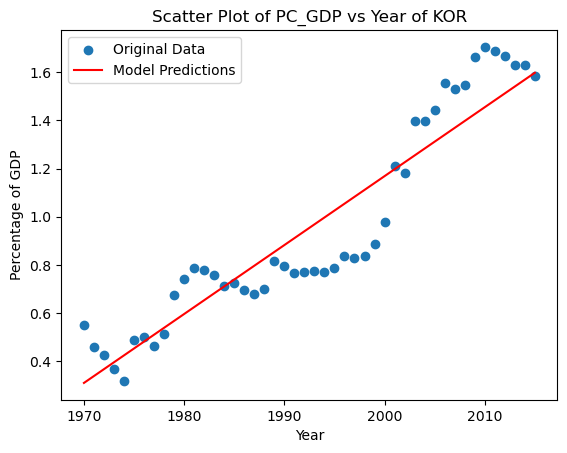

     slope  intercept
0  0.01055 -20.397957
The RMSPE for NOR is: 0.0966
R^2 score: 0.6774974236364169


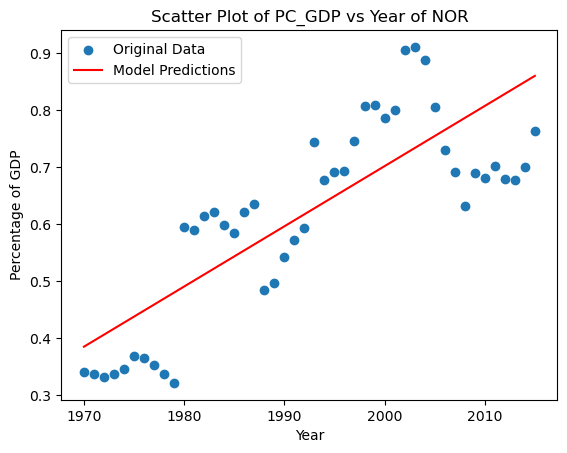

      slope  intercept
0  0.019646  -38.32367
The RMSPE for SWE is: 0.1032
R^2 score: 0.846492945909155


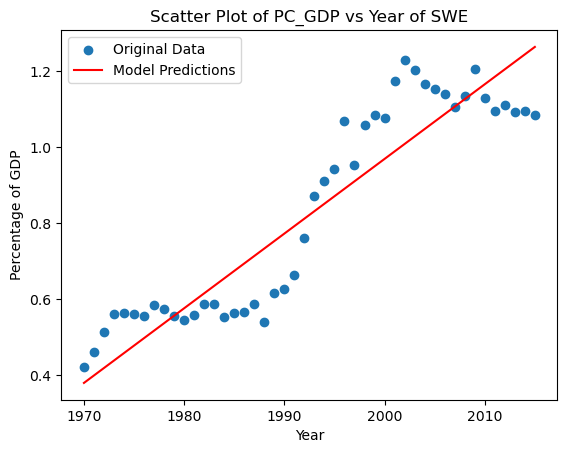

In [65]:
# Defining the linear regression function for PC_GDP vs TIME
def LR(country):

    country_name = country.LOCATION.unique()[0]

    country_train, country_test = train_test_split(
        country, train_size=0.8, random_state=42
    )

    lm = LinearRegression()
    lm.fit(
    country_train[["TIME"]],
    country_train["PC_GDP"]  
    )

    print(pd.DataFrame({"slope": [lm.coef_[0]], "intercept": [lm.intercept_]}))

    # make predictions
    country_test["predicted"] = lm.predict(country_test[["TIME"]])

    # calculate and RMSPE to 4 decimal points
    RMSPE = mean_squared_error(
        y_true=country_test["PC_GDP"],
        y_pred=country_test["predicted"]
    )**(1/2)
    print(f"The RMSPE for {country_name} is: {RMSPE:.4f}")

    # calculate R^2 score
    r2 = r2_score(country_test["PC_GDP"], country_test["predicted"])
    print(f"R^2 score: {r2}")

    # This line calculates the minimum and maximum values of the "TIME" column in the df_all_years dataset.
    time_prediction_grid = country[["TIME"]].agg(["min", "max"])

    # Uses the linear model to predict prices for the min and max time values.
    time_prediction_grid["predicted"] = lm.predict(time_prediction_grid)

    # Plot the original data
    plt.scatter(country["TIME"], country["PC_GDP"], label='Original Data')

    # Plot the model predictions as a line
    plt.plot(time_prediction_grid["TIME"], time_prediction_grid["predicted"], color='red', label='Model Predictions')

    # Add labels and legend
    plt.xlabel('Year')
    plt.ylabel('Percentage of GDP')
    plt.title(f'Scatter Plot of PC_GDP vs Year of {country_name}')
    plt.legend()

    # Show the plot
    plt.show()

# Applying the function to each country in df_all_years
for country_name, country_group in df_all_years1.groupby("LOCATION"):
    LR(country_group)

PC_GDP vs USD_CAP

      slope  intercept
0  0.001718   0.615777
The RMSPE for CAN is: 0.1033
R^2 score: 0.9598948724630153


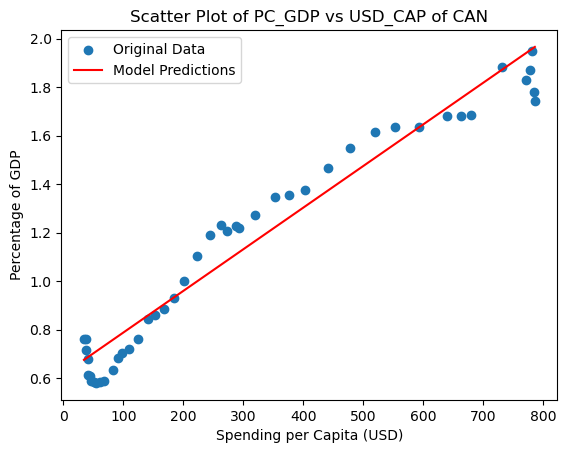

      slope  intercept
0  0.000913   1.016417
The RMSPE for DEU is: 0.0517
R^2 score: 0.9340309080711724


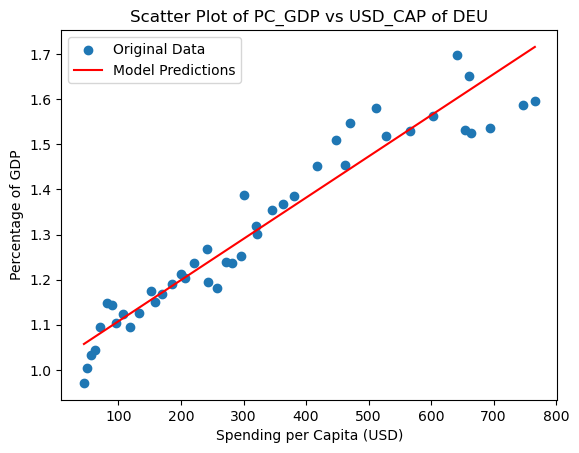

      slope  intercept
0  0.001272   0.651085
The RMSPE for FIN is: 0.0985
R^2 score: 0.8284958545627963


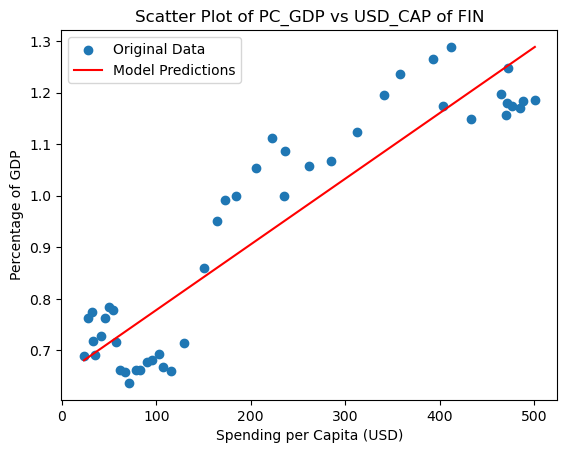

     slope  intercept
0  0.00098   0.842407
The RMSPE for ISL is: 0.1040
R^2 score: 0.8024525263762982


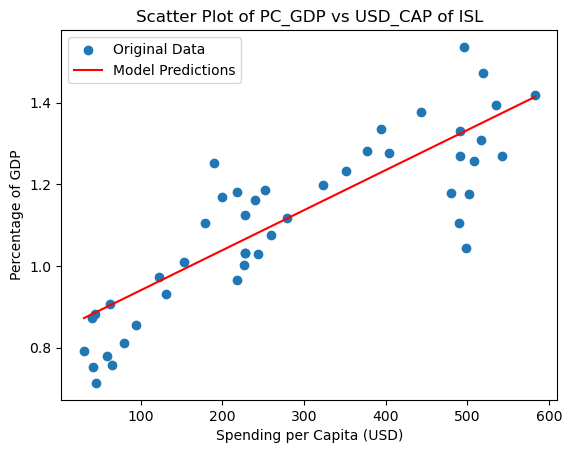

      slope  intercept
0  0.002126   0.600879
The RMSPE for KOR is: 0.1438
R^2 score: 0.924278356141955


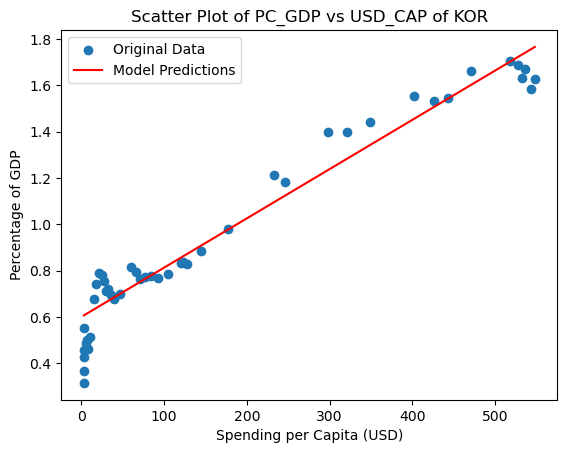

      slope  intercept
0  0.000846   0.459159
The RMSPE for NOR is: 0.1116
R^2 score: 0.56947875376377


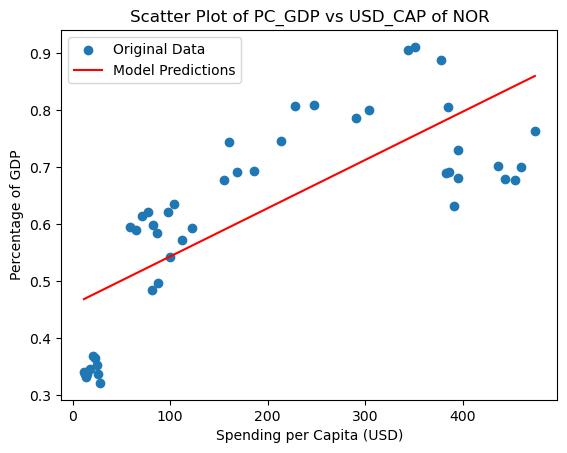

      slope  intercept
0  0.001537   0.482698
The RMSPE for SWE is: 0.1031
R^2 score: 0.8466652498021409


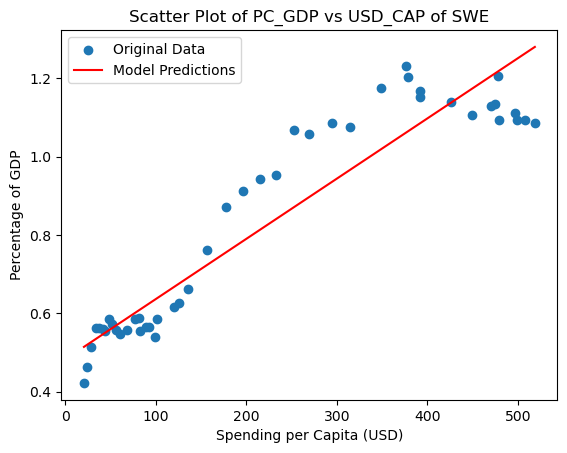

In [66]:
# Defining the linear regression function for PC_GDP vs US_CAP
def LR(country):

    country_name = country.LOCATION.unique()[0]

    country_train, country_test = train_test_split(
        country, train_size=0.8, random_state=42
    )

    lm = LinearRegression()
    lm.fit(
    country_train[["USD_CAP"]],
    country_train["PC_GDP"]  
    )

    print(pd.DataFrame({"slope": [lm.coef_[0]], "intercept": [lm.intercept_]}))

    # make predictions
    country_test["predicted"] = lm.predict(country_test[["USD_CAP"]])

    # calculate and RMSPE to 4 decimal points
    RMSPE = mean_squared_error(
        y_true=country_test["PC_GDP"],
        y_pred=country_test["predicted"]
    )**(1/2)
    print(f"The RMSPE for {country_name} is: {RMSPE:.4f}")
    
    # calculate R^2 score
    r2 = r2_score(country_test["PC_GDP"], country_test["predicted"])
    print(f"R^2 score: {r2}")

    # This line calculates the minimum and maximum values of the "TIME" column in the df_all_years dataset.
    time_prediction_grid = country[["USD_CAP"]].agg(["min", "max"])

    # Uses the linear model to predict prices for the min and max time values.
    time_prediction_grid["predicted"] = lm.predict(time_prediction_grid)

    # Plot the original data
    plt.scatter(country["USD_CAP"], country["PC_GDP"], label='Original Data')

    # Plot the model predictions as a line
    plt.plot(time_prediction_grid["USD_CAP"], time_prediction_grid["predicted"], color='red', label='Model Predictions')

    # Add labels and legend
    plt.xlabel('Spending per Capita (USD)')
    plt.ylabel('Percentage of GDP')
    plt.title(f'Scatter Plot of PC_GDP vs USD_CAP of {country_name}')
    plt.legend()

    # Show the plot
    plt.show()

# Applying the function to each country in df_all_years
for country_name, country_group in df_all_years1.groupby("LOCATION"):
    LR(country_group)

PC_HEALTHXP vs PC_GDP

      slope  intercept
0  7.834455   4.580301
The RMSPE for CAN is: 0.8113
R^2 score: 0.9538920275479262


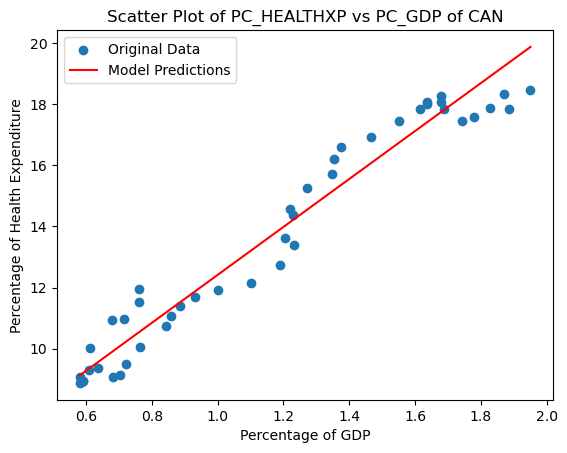

      slope  intercept
0 -0.234299  14.883819
The RMSPE for DEU is: 0.6734
R^2 score: -0.3949084933144196


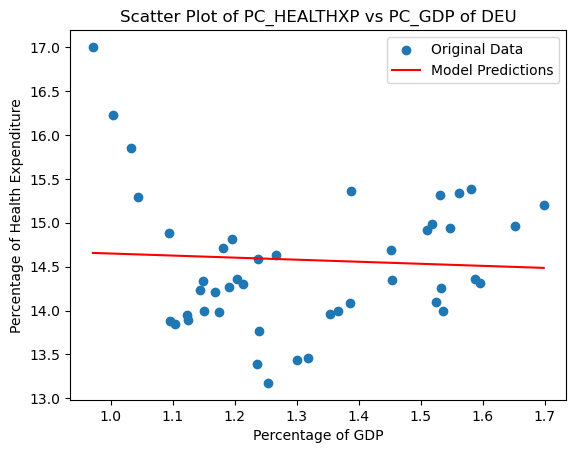

      slope  intercept
0  7.105196   6.395246
The RMSPE for FIN is: 1.4448
R^2 score: 0.042322181477330245


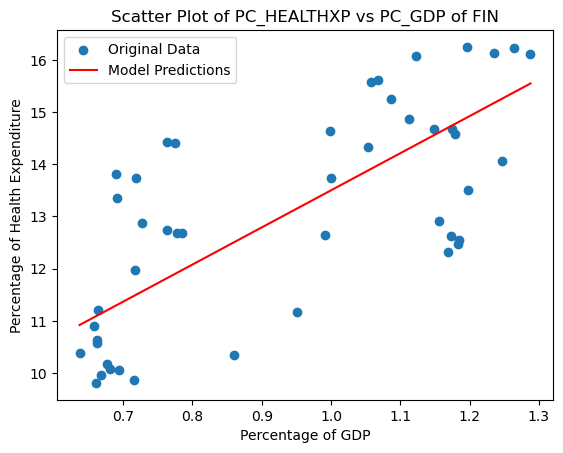

      slope  intercept
0 -0.370905  15.451237
The RMSPE for ISL is: 1.2062
R^2 score: -0.10679296049005815


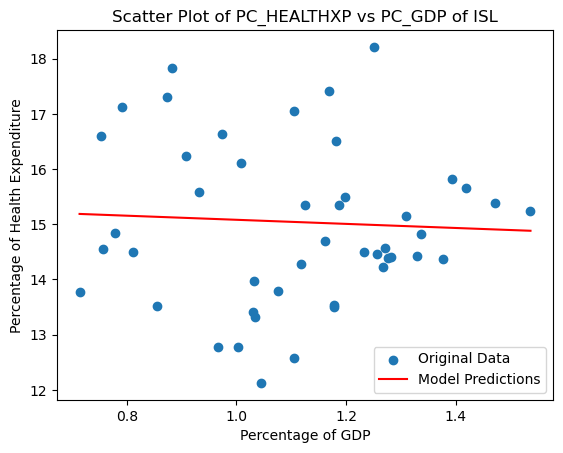

      slope  intercept
0  5.035543  18.448157
The RMSPE for KOR is: 1.5815
R^2 score: 0.5690284094020452


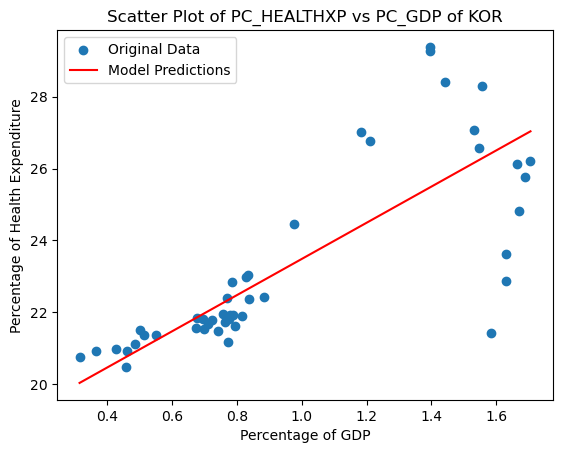

      slope  intercept
0  5.011834   5.750754
The RMSPE for NOR is: 1.2506
R^2 score: 0.328675688389213


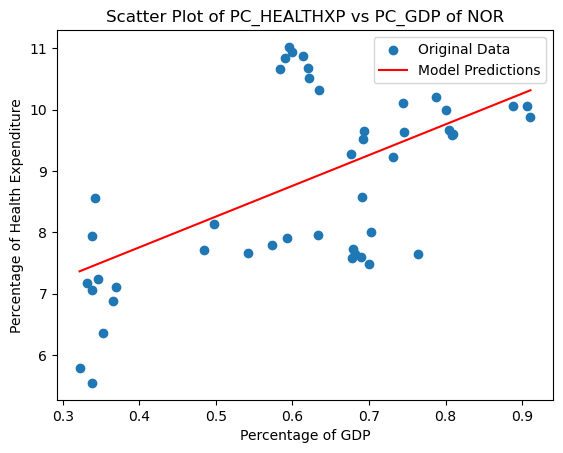

      slope  intercept
0  9.505827    2.64582
The RMSPE for SWE is: 1.6316
R^2 score: 0.5785921682420139


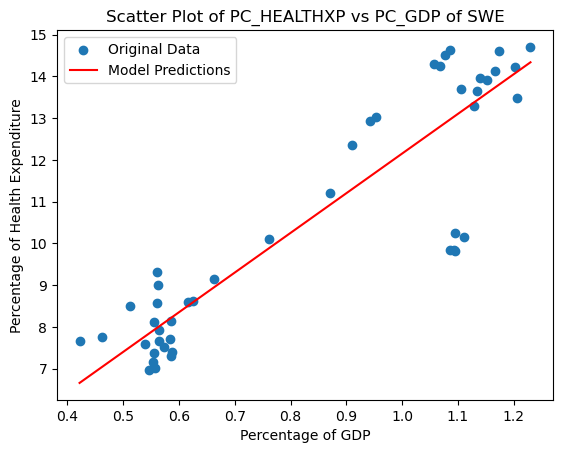

In [68]:
# Defining the linear regression function for PC_GDP vs US_CAP
def LR(country):

    country_name = country.LOCATION.unique()[0]

    country_train, country_test = train_test_split(
        country, train_size=0.8, random_state=42
    )

    lm = LinearRegression()
    lm.fit(
    country_train[["PC_GDP"]],
    country_train["PC_HEALTHXP"]  
    )

    print(pd.DataFrame({"slope": [lm.coef_[0]], "intercept": [lm.intercept_]}))

    # make predictions
    country_test["predicted"] = lm.predict(country_test[["PC_GDP"]])

    # calculate and RMSPE to 4 decimal points
    RMSPE = mean_squared_error(
        y_true=country_test["PC_HEALTHXP"],
        y_pred=country_test["predicted"]
    )**(1/2)
    print(f"The RMSPE for {country_name} is: {RMSPE:.4f}")
    
    # calculate R^2 score
    r2 = r2_score(country_test["PC_HEALTHXP"], country_test["predicted"])
    print(f"R^2 score: {r2}")

    # This line calculates the minimum and maximum values of the "TIME" column in the df_all_years dataset.
    time_prediction_grid = country[["PC_GDP"]].agg(["min", "max"])

    # Uses the linear model to predict prices for the min and max time values.
    time_prediction_grid["predicted"] = lm.predict(time_prediction_grid)

    # Plot the original data
    plt.scatter(country["PC_GDP"], country["PC_HEALTHXP"], label='Original Data')

    # Plot the model predictions as a line
    plt.plot(time_prediction_grid["PC_GDP"], time_prediction_grid["predicted"], color='red', label='Model Predictions')

    # Add labels and legend
    plt.xlabel('Percentage of GDP')
    plt.ylabel('Percentage of Health Expenditure')
    plt.title(f'Scatter Plot of PC_HEALTHXP vs PC_GDP of {country_name}')
    plt.legend()

    # Show the plot
    plt.show()

# Applying the function to each country in df_all_years
for country_name, country_group in df_all_years1.groupby("LOCATION"):
    LR(country_group)